<a href="https://colab.research.google.com/github/farelkun/bacteria-detection-rcnn/blob/master/objectdetection_faster_rcnn_well_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install extra-keras-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from extra_keras_datasets import emnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/train/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4240 files belonging to 5 classes.
Using 3392 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 339 files belonging to 5 classes.
Using 67 files for validation.


In [ ]:
test_ds = tf.data.Dataset.list_files(str('/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/testing/*'), shuffle=False)

image_counttest = len(list('/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/testing/*.png'))
print(image_counttest)

95


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Acinetobacter_baumanii', 'Bacteroides_fragilis', 'Clostridium_perfringens', 'Escherichia_coli', 'Lactobacillus_casei']


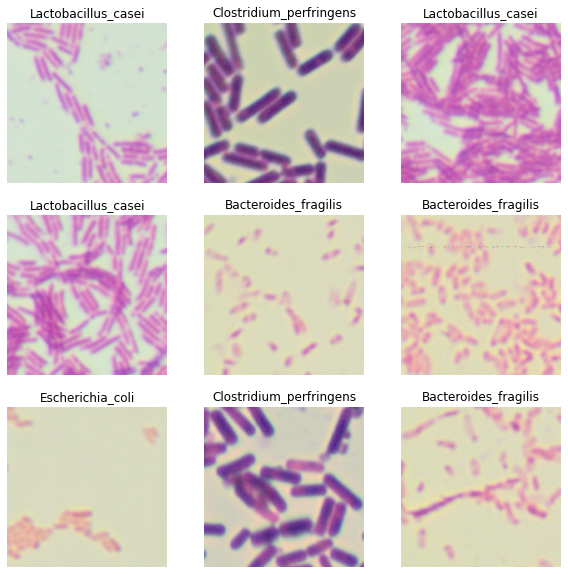

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.37259987 0.95294124


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
106/106 [==============================] - 405s 4s/step - loss: 0.9156 - accuracy: 0.5887 - val_loss: 0.7823 - val_accuracy: 0.6716
Epoch 2/3
106/106 [==============================] - 123s 1s/step - loss: 0.5731 - accuracy: 0.7521 - val_loss: 0.4889 - val_accuracy: 0.8358
Epoch 3/3
106/106 [==============================] - 119s 1s/step - loss: 0.4076 - accuracy: 0.8420 - val_loss: 0.2641 - val_accuracy: 0.8955


In [ ]:
image_count = len(list('/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/*/*.png'))
print(image_count)

100


In [ ]:
list_ds = tf.data.Dataset.list_files(str('/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
for f in list_ds.take(10):
  print(f.numpy())

b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Acinetobacter_baumanii/img66.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Acinetobacter_baumanii/img488.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Acinetobacter_baumanii/img693.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Bacteroides_fragilis/img302.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Bacteroides_fragilis/img295.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Bacteroides_fragilis/img298.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Acinetobacter_baumanii/img400.png'
b'/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/validation/Ac

In [ ]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [ ]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

319
20


In [ ]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [ ]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in train_ds.take(2):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0
Image shape:  (180, 180, 3)
Label:  1


In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

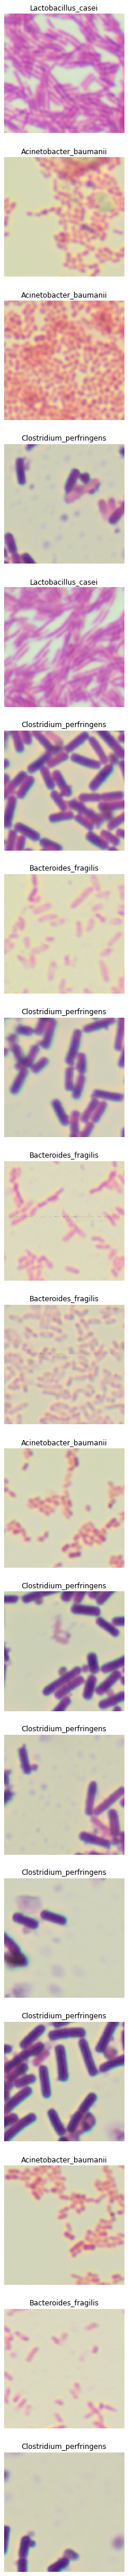

In [ ]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(80, 80))
for i in range(18):
  ax = plt.subplot(18, 1, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
10/10 [==============================] - 14s 1s/step - loss: 0.3066 - accuracy: 0.8840 - val_loss: 0.3841 - val_accuracy: 0.7500
Epoch 2/3
10/10 [==============================] - 11s 1s/step - loss: 0.2228 - accuracy: 0.9310 - val_loss: 0.5254 - val_accuracy: 0.7000
Epoch 3/3
10/10 [==============================] - 12s 1s/step - loss: 0.2129 - accuracy: 0.9279 - val_loss: 0.4398 - val_accuracy: 0.7500


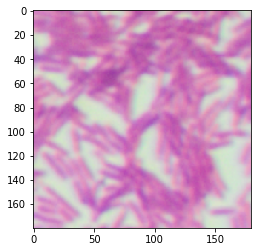

This image most likely belongs to Lactobacillus_casei with a 100.00 percent confidence.


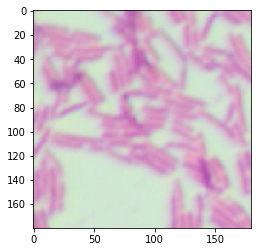

This image most likely belongs to Lactobacillus_casei with a 100.00 percent confidence.


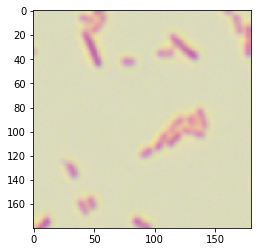

This image most likely belongs to Escherichia_coli with a 76.69 percent confidence.


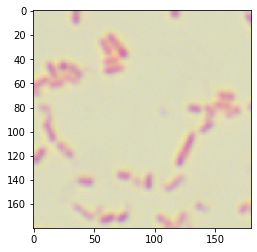

This image most likely belongs to Escherichia_coli with a 80.95 percent confidence.


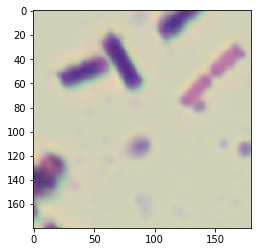

This image most likely belongs to Clostridium_perfringens with a 99.95 percent confidence.


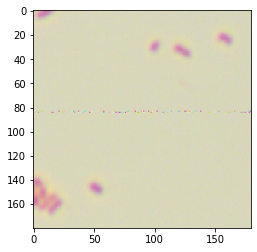

This image most likely belongs to Escherichia_coli with a 53.83 percent confidence.


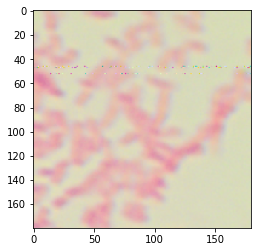

This image most likely belongs to Bacteroides_fragilis with a 97.58 percent confidence.


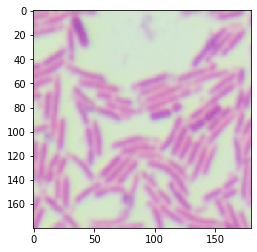

This image most likely belongs to Lactobacillus_casei with a 100.00 percent confidence.


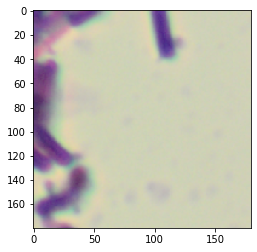

This image most likely belongs to Clostridium_perfringens with a 99.93 percent confidence.


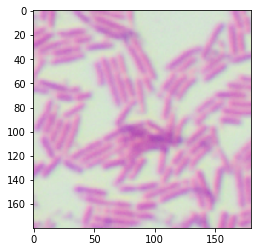

This image most likely belongs to Lactobacillus_casei with a 100.00 percent confidence.


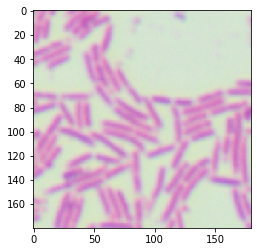

This image most likely belongs to Lactobacillus_casei with a 100.00 percent confidence.


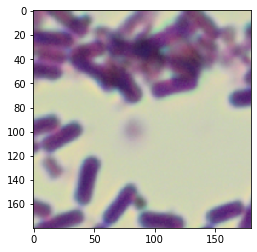

This image most likely belongs to Clostridium_perfringens with a 99.93 percent confidence.


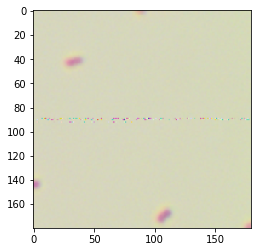

This image most likely belongs to Escherichia_coli with a 50.04 percent confidence.


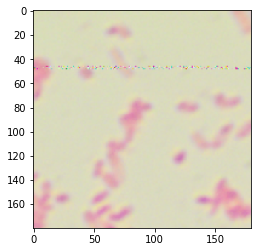

This image most likely belongs to Bacteroides_fragilis with a 82.06 percent confidence.


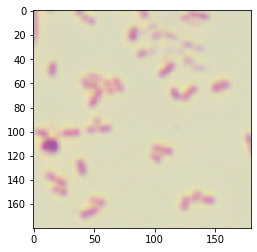

This image most likely belongs to Escherichia_coli with a 75.69 percent confidence.


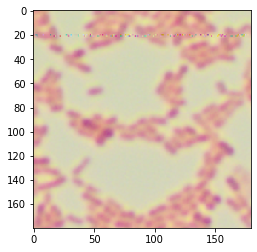

This image most likely belongs to Acinetobacter_baumanii with a 99.22 percent confidence.


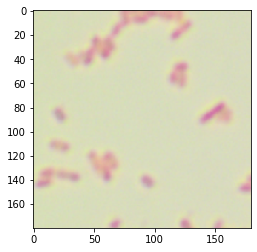

This image most likely belongs to Escherichia_coli with a 79.67 percent confidence.


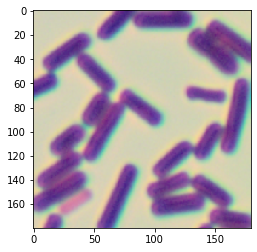

This image most likely belongs to Clostridium_perfringens with a 100.00 percent confidence.


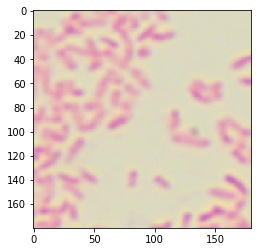

This image most likely belongs to Bacteroides_fragilis with a 99.98 percent confidence.


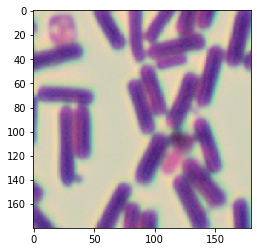

This image most likely belongs to Clostridium_perfringens with a 100.00 percent confidence.


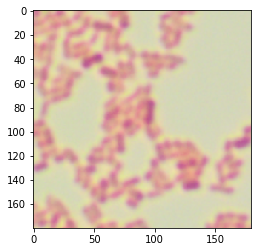

This image most likely belongs to Acinetobacter_baumanii with a 99.96 percent confidence.


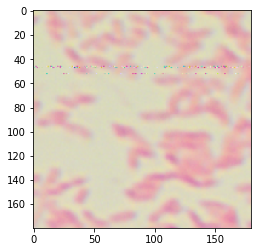

This image most likely belongs to Bacteroides_fragilis with a 99.92 percent confidence.


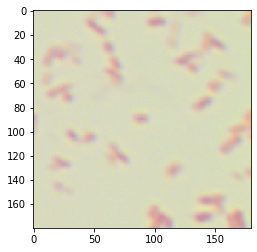

This image most likely belongs to Escherichia_coli with a 76.64 percent confidence.


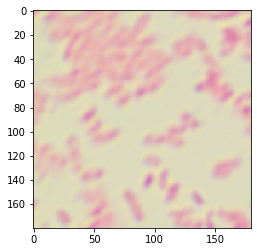

This image most likely belongs to Bacteroides_fragilis with a 99.28 percent confidence.


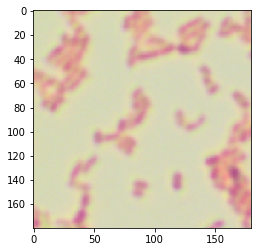

This image most likely belongs to Acinetobacter_baumanii with a 99.42 percent confidence.


In [ ]:
import os

arr = os.listdir('drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/testing')
for i in arr:
  img = tf.keras.utils.load_img(
      '/content/drive/MyDrive/Kuliah/PCVK/object-detection-bacteria-faster-rcnn/basedata/testing/' + i, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  plt.imshow(img)
  plt.show()
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )